## Homework 1

Create a small neural network in Keras that classifies the different types of winee. Their labels are the columns called 'Class'. Print the history of the neural network with the loss, accuracy and validation accuracy. you can use Sequetial neural network or Fast neural network. 

In [1]:
import pandas as pd
df = pd.read_csv('wines.csv')
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.shape

(178, 14)

In [5]:
X = df.drop(['Class'], axis=1).values
X.shape

(178, 13)

In [7]:
y = df['Class'].values
y.shape

(178,)

In [9]:
df['Class'].unique()

array([1, 2, 3])

In [11]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [12]:
# label encoding(from 1,2,3 to 0,1,2)
# to_categorical makes the labels into one hot encoded vectors, but class labels should be zero-based indices.  
y = y-1
y_cat = to_categorical(y)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size = 0.2, random_state = 0)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Sequential Neural Network

In [15]:
model = Sequential()
model.add(Input(shape=(13,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Amount of class is 3. Therefore, the output layer should be 3. 

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=40, batch_size=8, verbose=1)

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5018 - loss: 0.9915 - val_accuracy: 0.7500 - val_loss: 0.7428
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9233 - loss: 0.5961 - val_accuracy: 0.9167 - val_loss: 0.4901
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9921 - loss: 0.3781 - val_accuracy: 1.0000 - val_loss: 0.3153
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9959 - loss: 0.2092 - val_accuracy: 1.0000 - val_loss: 0.1999
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9923 - loss: 0.1317 - val_accuracy: 1.0000 - val_loss: 0.1390
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9865 - loss: 0.0971 - val_accuracy: 1.0000 - val_loss: 0.1045
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9993 - loss: 0.0745 - val_accuracy: 1.0000 - val_loss: 0.0814
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9980 - loss: 0.0484 - val_accuracy: 1.0000 - val_loss:

In [18]:
history.history

{'accuracy': [0.6267605423927307,
  0.9366196990013123,
  0.9788732528686523,
  0.98591548204422,
  0.98591548204422,
  0.9929577708244324,
  0.9929577708244324,
  0.9929577708244324,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.8818768858909607,
  0.5402942299842834,
  0.33363208174705505,
  0.2016219198703766,
  0.13191644847393036,
  0.09259902685880661,
  0.0699826329946518,
  0.05475536361336708,
  0.044858623296022415,
  0.03680247813463211,
  0.03150516748428345,
  0.026735419407486916,
  0.024004487320780754,
  0.019694307819008827,
  0.01736772619187832,
  0.015191415324807167,
  0.013741758652031422,
  0.012169274501502514,
  0.010737542994320393,
  0.009615639224648476,
  0.008839813061058521,
  0.00831623561680317,
  0.007125562522560358,
  0.006524139083921909,
  0.006011941470205784,

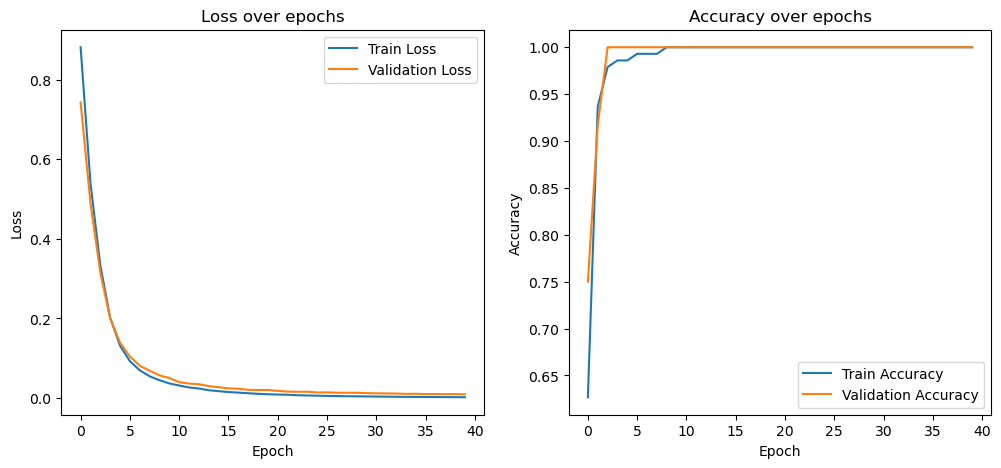

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Functional Neural Network

In [35]:
from tensorflow.keras.models import Model

inputs = Input(shape=(13,))
x = Dense(64, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)
outputs = Dense(3, activation='softmax')(x)

model2 = Model(inputs=inputs, outputs=outputs)

In [37]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
history2 = model2.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=40, batch_size=8, verbose=1)

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4046 - loss: 1.0478 - val_accuracy: 0.8056 - val_loss: 0.7774
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8510 - loss: 0.6642 - val_accuracy: 0.9167 - val_loss: 0.5072
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9613 - loss: 0.4350 - val_accuracy: 0.9167 - val_loss: 0.3317
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9779 - loss: 0.2551 - val_accuracy: 0.9722 - val_loss: 0.2104
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9964 - loss: 0.1632 - val_accuracy: 1.0000 - val_loss: 0.1339
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9817 - loss: 0.1278 - val_accuracy: 1.0000 - val_loss: 0.0971
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9937 - loss: 0.0823 - val_accuracy: 1.0000 - val_loss: 0.0729
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9980 - loss: 0.0590 - val_accuracy: 1.0000 - val_loss:

In [41]:
history.history

{'accuracy': [0.5704225301742554,
  0.922535240650177,
  0.9436619877815247,
  0.9718309640884399,
  0.98591548204422,
  0.9929577708244324,
  0.9929577708244324,
  0.9929577708244324,
  0.9929577708244324,
  0.9929577708244324,
  1.0,
  0.9929577708244324,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.9486348032951355,
  0.5818536281585693,
  0.3668484091758728,
  0.23666518926620483,
  0.15808412432670593,
  0.11346826702356339,
  0.0884394645690918,
  0.06593887507915497,
  0.05538720265030861,
  0.04526732116937637,
  0.03848918154835701,
  0.03268393874168396,
  0.02793773077428341,
  0.024672769010066986,
  0.022083790972828865,
  0.019512226805090904,
  0.01754874549806118,
  0.015231780707836151,
  0.013653910718858242,
  0.012481162324547768,
  0.011500444263219833,
  0.010740583762526512,
  0.009543937630951405,
  0